In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pop = pd.read_csv("df_population.csv")
df_veg = pd.read_csv("df_vegetal.csv")
df_anim = pd.read_csv("nouveau_animaux.csv")

In [726]:
"""
1) Nettoyer les titres de colonnes :
Supprimer les espaces au début et à la fin des titres
Remplacer les espaces par des underscores (ceux se situant entre les mots)
Tout mettre en minuscule
"""
df_pop.columns = df_pop.columns.str.replace(' ', '_').str.lower()
df_anim.columns = df_anim.columns.str.replace(' ', '_').str.lower()
df_veg.columns = df_veg.columns.str.replace(' ', '_').str.lower()

### 2) Quelles sont les dimensions des jeux de données ?

In [727]:
print(f"Dimensions du df_pop : {df_pop.ndim}. Shape du df_pop : {df_pop.shape}")
print(f"Dimensions du df_anim : {df_anim.ndim}. Shape du df_anim : {df_anim.shape}")
print(f"Dimensions du df_veg : {df_veg.ndim}. Shape du df_veg : {df_veg.shape}")

Dimensions du df_pop : 2. Shape du df_pop : (364, 14)
Dimensions du df_anim : 2. Shape du df_anim : (27713, 14)
Dimensions du df_veg : 2. Shape du df_veg : (92233, 14)


### 3) A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [728]:
df_pop.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,36686.78,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,37769.50,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,2877.01,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,2873.88,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,41927.01,X,Figure from international organizations


In [729]:
df_veg.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,162.62,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,160.40,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/cap/d,1365.34,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/cap/d,1346.93,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/cap/d,41.23,E,Estimated value


In [730]:
df_anim.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.76,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/cap/d,14.92,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/cap/d,15.42,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/cap/d,1.12,E,Estimated value


### 4) Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.

In [731]:
df_anim["type"] = "animal"
df_veg["type"] = "vegetal"
df_products = pd.merge(df_veg, df_anim, how = "left")

### 5) Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’

In [732]:
df_pop.head(3)
df_pop = df_pop[["area_code_(m49)", "area", "year", "value"]]
df_pop = df_pop.rename(columns={"value" : "pop_1000_hab"})
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50
2,8,Albania,2018,2877.01
3,8,Albania,2019,2873.88
4,12,Algeria,2018,41927.01
...,...,...,...,...
359,887,Yemen,2019,31546.69
360,894,Zambia,2018,17835.89
361,894,Zambia,2019,18380.48
362,716,Zimbabwe,2018,15052.18


### 6) Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit.

In [733]:
df_products = df_products[["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
df_products

,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23
...,...,...,...,...,...,...,...,...
92228,716,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,vegetal,kcal/cap/d,7.52
92229,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/cap/d,0.19
92230,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,vegetal,g/cap/d,0.46
92231,716,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/cap/d,0.03


### 7) Fusionnez df_pop avec product et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur le capture d’écran ci-dessous.

In [734]:
df = pd.merge(df_products, df_pop, on=["area", "year", "area_code_(m49)"], how="left")
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
92228,716,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,vegetal,kcal/cap/d,7.52,15354.61
92229,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/cap/d,0.19,15052.18
92230,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,vegetal,g/cap/d,0.46,15354.61
92231,716,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/cap/d,0.03,15052.18


### 8) Quelles sont les types de données de chaque colonne ?

In [735]:
df.dtypes

area_code_(m49)      int64
area                object
element             object
item                object
year                 int64
type                object
unit                object
value              float64
pop_1000_hab       float64
dtype: object

### 9) Combien y-a t’il de valeurs manquantes par variable ?

In [736]:
df.isna().sum()

area_code_(m49)    0
area               0
element            0
item               0
year               0
type               0
unit               0
value              0
pop_1000_hab       0
dtype: int64

### 10) Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [737]:
df.describe()

,area_code_(m49),year,value,pop_1000_hab
count,92233.000000,92233.000000,92233.000000,9.223300e+04
mean,427.527826,2018.509677,11.762533,4.338412e+04
std,250.409769,0.499909,60.669772,1.536543e+05
min,4.000000,2018.000000,0.000000,1.213000e+01
25%,208.000000,2018.000000,0.010000,2.508880e+03
50%,422.000000,2019.000000,0.170000,9.958830e+03
75%,642.000000,2019.000000,2.590000,3.154669e+04
max,894.000000,2019.000000,1744.850000,1.421864e+06


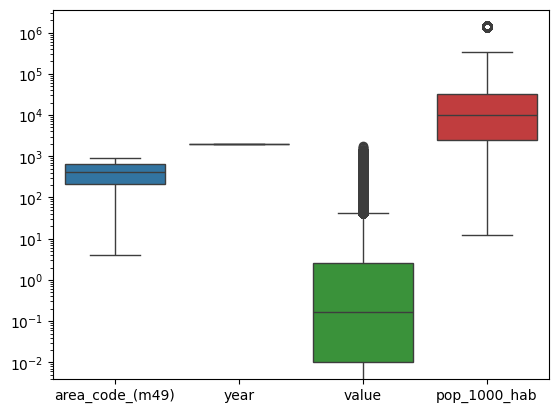

In [738]:
sns.boxplot(data=df, whis=15)
plt.yscale("log")
plt.show()

### 11) Affichez les valeurs uniques de la colonne country

In [739]:
df["area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polyn

 ### 12) Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.

In [740]:
#RAS
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
92228,716,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,vegetal,kcal/cap/d,7.52,15354.61
92229,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/cap/d,0.19,15052.18
92230,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,vegetal,g/cap/d,0.46,15354.61
92231,716,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/cap/d,0.03,15052.18


### 13) Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [741]:
# MODIFICATION DU NOM DE LA VARIABLE AREA_CODE
df = df.rename(columns={"area_code_(m49)" : "area_code"})
df = df.rename(columns={"element" : "index"})

In [742]:
df = df.pivot_table(index=["area_code", "area", "year", "pop_1000_hab", "type", "item"], columns="index", values="value")

In [743]:
df = df.reset_index()
df

index,area_code,area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,36686.78,vegetal,Apples and products,0.05,7.23,5.01,0.04
1,4,Afghanistan,2018,36686.78,vegetal,Bananas,0.01,7.05,3.90,0.09
2,4,Afghanistan,2018,36686.78,vegetal,Barley and products,0.01,1.67,0.22,0.06
3,4,Afghanistan,2018,36686.78,vegetal,Beer,0.00,0.00,0.00,0.00
4,4,Afghanistan,2018,36686.78,vegetal,"Beverages, Alcoholic",0.00,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
23082,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
23083,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
23084,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
23085,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 14) Faire du nettoyage dans le nom des colonnes
Notez bien la dimension du jeu de données. Si tout s'est bien déroulé vous devez avoir le même resultat, sinon revoyez les étapes précédentes.

In [744]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.shape

(23087, 10)

In [745]:
df = df.rename(columns={"area":"country", "area_code" : "country_code"})
df 

index,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,vegetal,Apples and products,0.05,7.23,5.01,0.04
1,4,Afghanistan,2018,36686.78,vegetal,Bananas,0.01,7.05,3.90,0.09
2,4,Afghanistan,2018,36686.78,vegetal,Barley and products,0.01,1.67,0.22,0.06
3,4,Afghanistan,2018,36686.78,vegetal,Beer,0.00,0.00,0.00,0.00
4,4,Afghanistan,2018,36686.78,vegetal,"Beverages, Alcoholic",0.00,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
23082,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
23083,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
23084,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
23085,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 15) Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [746]:
filtre_2018 = df["year"] == 2018
df[filtre_2018]

index,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,vegetal,Apples and products,0.05,7.23,5.01,0.04
1,4,Afghanistan,2018,36686.78,vegetal,Bananas,0.01,7.05,3.90,0.09
2,4,Afghanistan,2018,36686.78,vegetal,Barley and products,0.01,1.67,0.22,0.06
3,4,Afghanistan,2018,36686.78,vegetal,Beer,0.00,0.00,0.00,0.00
4,4,Afghanistan,2018,36686.78,vegetal,"Beverages, Alcoholic",0.00,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
23017,894,Zambia,2018,17835.89,vegetal,Tea (including mate),0.00,0.04,0.11,0.00
23018,894,Zambia,2018,17835.89,vegetal,Tomatoes and products,0.01,0.77,1.38,0.03
23019,894,Zambia,2018,17835.89,vegetal,"Vegetables, other",0.18,15.27,20.14,1.28
23020,894,Zambia,2018,17835.89,vegetal,Wheat and products,0.29,60.49,7.99,1.91


### 16) Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. J’ai récupéré ces informations pour vous sur le site de la FAO. Effectuer un merge entre ce jeu de données et le vôtre.
BONUS Créer ce jeu de données par vous même sur le site de la FAO.

In [747]:
# CSV sur FAO
df_regions = pd.read_csv('continents.csv')
df_regions.columns = df_regions.columns.str.replace(' ', '_').str.lower()
df_regions = df_regions[["country_group", "country", "m49_code"]]
df_regions = df_regions.rename(columns={"m49_code" : "country_code"})
df_regions 

,country_group,country,country_code
0,Africa,"Africa, unspecified",577.0
1,Africa,Algeria,12.0
2,Africa,Angola,24.0
3,Africa,Benin,204.0
4,Africa,Botswana,72.0
...,...,...,...
2538,World,Yemen Ar Rp,886.0
2539,World,Yemen Dem,720.0
2540,World,Yugoslav SFR,890.0
2541,World,Zambia,894.0


In [748]:
df_regions["country_code"] = df_regions["country_code"].fillna(0).astype(int)
df_regions["country_code"] = df_regions["country_code"].astype(int)

In [749]:
df_zones_geo = pd.DataFrame({"country_group" : ['Caribbean',
       'Central America', 'Central Asia',
       'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Middle Africa',
       'Northern Africa', 'Northern America', 'Northern Europe',
       'Oceania', 'South America', 'Southern Africa', 'Southern Asia','Southern Europe',
       'Sub-Saharan Africa',
       'Western Africa', 'Western Asia','Western Europe']})

df_zones_geo

,country_group
0,Caribbean
1,Central America
2,Central Asia
3,Eastern Africa
4,Eastern Asia
5,Eastern Europe
6,Middle Africa
7,Northern Africa
8,Northern America
9,Northern Europe


In [750]:
df_merge = pd.merge(df_zones_geo, df_regions, on="country_group", how="left")
df_merge[["country", "country_code"]] = df_merge[["country", "country_code"]].drop_duplicates()
df_merge

,country_group,country,country_code
0,Caribbean,Anguilla,660.0
1,Caribbean,Antigua and Barbuda,28.0
2,Caribbean,Aruba,533.0
3,Caribbean,Bahamas,44.0
4,Caribbean,Barbados,52.0
...,...,...,...
327,Western Europe,Luxembourg,442.0
328,Western Europe,Monaco,492.0
329,Western Europe,Netherlands (Kingdom of the),528.0
330,Western Europe,Switzerland,756.0


In [751]:
df_continents = pd.read_csv("continents-according-to-our-world-in-data.csv")
df_continents.columns = df_continents.columns.str.replace(" ", "_").str.lower()
df_continents = df_continents.rename(columns={"entity": "country"})
df_continents = df_continents[["country", "continent"]]
df_continents 

,country,continent
0,Abkhazia,Asia
1,Afghanistan,Asia
2,Akrotiri and Dhekelia,Asia
3,Aland Islands,Europe
4,Albania,Europe
...,...,...
280,Yemen People's Republic,Asia
281,Yugoslavia,Europe
282,Zambia,Africa
283,Zanzibar,Africa


In [752]:
df = pd.merge(df, df_merge, on=["country_code", "country"], how="left")
df

,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),country_group
0,4,Afghanistan,2018,36686.78,vegetal,Apples and products,0.05,7.23,5.01,0.04,Southern Asia
1,4,Afghanistan,2018,36686.78,vegetal,Bananas,0.01,7.05,3.90,0.09,Southern Asia
2,4,Afghanistan,2018,36686.78,vegetal,Barley and products,0.01,1.67,0.22,0.06,Southern Asia
3,4,Afghanistan,2018,36686.78,vegetal,Beer,0.00,0.00,0.00,0.00,Southern Asia
4,4,Afghanistan,2018,36686.78,vegetal,"Beverages, Alcoholic",0.00,0.02,0.00,0.00,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...
23082,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00,Eastern Africa
23083,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03,Eastern Africa
23084,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12,Eastern Africa
23085,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80,Eastern Africa


In [753]:
final_df = pd.merge(df, df_continents, on=["country"], how="left")
final_df = final_df[["continent", "country_group", "country_code","country","year",	"pop_1000_hab",	"type",	"item",	"fat_supply_quantity_(g/capita/day)",	"food_supply_(kcal/capita/day)",	"food_supply_quantity_(kg/capita/yr)",	"protein_supply_quantity_(g/capita/day)"]]
final_df.rename(columns={"country_group" : "geographical_area"})
final_df

,continent,country_group,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,Asia,Southern Asia,4,Afghanistan,2018,36686.78,vegetal,Apples and products,0.05,7.23,5.01,0.04
1,Asia,Southern Asia,4,Afghanistan,2018,36686.78,vegetal,Bananas,0.01,7.05,3.90,0.09
2,Asia,Southern Asia,4,Afghanistan,2018,36686.78,vegetal,Barley and products,0.01,1.67,0.22,0.06
3,Asia,Southern Asia,4,Afghanistan,2018,36686.78,vegetal,Beer,0.00,0.00,0.00,0.00
4,Asia,Southern Asia,4,Afghanistan,2018,36686.78,vegetal,"Beverages, Alcoholic",0.00,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
23082,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
23083,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
23084,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
23085,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 17) Quelle est la médiane de la variable food_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? Interpréter ces valeurs en les intégrant dasn une phrase.

In [754]:
final_df["food_supply_quantity_(g/capita/day)"] = [value*1000/365 for value in final_df["food_supply_quantity_(kg/capita/yr)"]]
describe_food_supply = final_df["food_supply_quantity_(g/capita/day)"].describe()
print(describe_food_supply)
print(" ")
print(f'Au moins 1/4, 25% des valeurs sont inférieures ou égales à {round(describe_food_supply.loc["25%"],3)} (Q1).')
print(f'Au moins 3/4 (75%) des valeurs sont inférieures où égales à {round(describe_food_supply.loc["75%"], 3)} (Q3). ') 
print(f'Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : {round(describe_food_supply.loc["50%"], 3)})')

count    23005.000000
mean        24.163232
std         63.639172
min          0.000000
25%          0.109589
50%          1.863014
75%         15.561644
max       1122.328767
Name: food_supply_quantity_(g/capita/day), dtype: float64
 
Au moins 1/4, 25% des valeurs sont inférieures ou égales à 0.11 (Q1).
Au moins 3/4 (75%) des valeurs sont inférieures où égales à 15.562 (Q3). 
Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : 1.863)


### 18) Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

<Axes: xlabel='fat_supply_quantity_(g/capita/day)', ylabel='Count'>

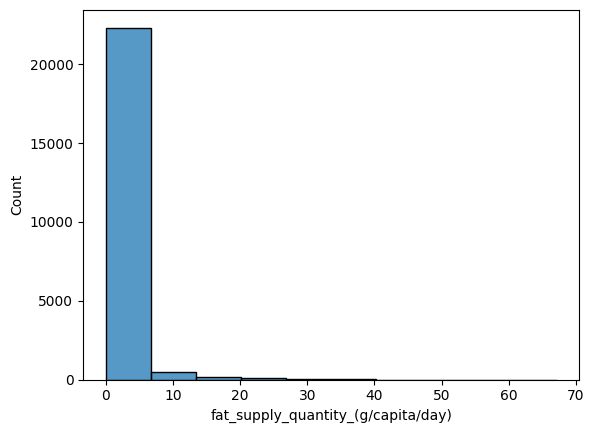

In [755]:
data = final_df["fat_supply_quantity_(g/capita/day)"]
sns.histplot(data, bins=10)

C:\Users\Thibaut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


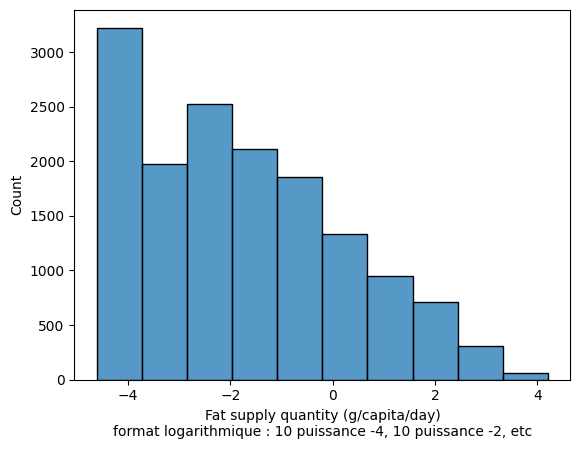

In [756]:
data = final_df["fat_supply_quantity_(g/capita/day)"]
data = np.log(data)
sns.histplot(data, bins=10)
plt.xlabel("Fat supply quantity (g/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
plt.show()
#les chiffres en X sont des 10 puissance chiffre (ex -4 = 10 puissance - 4)

### 19) Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [757]:
filter_2018 = final_df["year"] == 2018
ukraine = final_df["country"] == "Ukraine"
total_pop_ukraine_2018 = final_df[filter_2018 & ukraine]["pop_1000_hab"].unique()
print(f"Le total de la population ukrainienne en 2018 était de : {int(total_pop_ukraine_2018.item()*1000)} millions d'habitants.")

Le total de la population ukrainienne en 2018 était de : 44446950 millions d'habitants.


### 20) Quels sont les 10 pays les plus peuplés ?

In [758]:
filter_2019 = final_df["year"] == 2019

countries_with_highest_pop = final_df[filter_2019].groupby(["country", "year"])["pop_1000_hab"].first().reset_index()
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].values*1000
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].astype(int)
countries_with_highest_pop = countries_with_highest_pop.rename(columns={"pop_1000_hab" : "total_population"})
countries_with_highest_pop_sorted = countries_with_highest_pop.sort_values(by="total_population", ascending=False)
countries_with_highest_pop_sorted.head(10)

,country,year,total_population
36,"China, mainland",2019,1421864030
77,India,2019,1383112050
176,United States of America,2019,334319670
78,Indonesia,2019,269582880
127,Pakistan,2019,223293280
22,Brazil,2019,211782880
123,Nigeria,2019,203304490
12,Bangladesh,2019,165516220
139,Russian Federation,2019,145742290
85,Japan,2019,125791680


### 21) Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site.

In [759]:
final_df_2018 = final_df[filtre_2018]
world_pop_2018 = final_df_2018.groupby("country")["pop_1000_hab"].first().sum()
print(f"La population mondiale en 2018 était de : {int(world_pop_2018*1000)}")

La population mondiale en 2018 était de : 7620940580


In [760]:
final_df_2019 = final_df[filter_2019]
world_pop_2019 = final_df_2019.groupby("country")["pop_1000_hab"].first().sum()
print(f"La population mondiale en 2019 était de : {int(world_pop_2019*1000)}")

La population mondiale en 2019 était de : 7716661460


### 22) Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [775]:
test = final_df.groupby(["country", "year"])["pop_1000_hab"].first().reset_index()
test = test.rename(columns={"year" : "index"})
test = test.pivot_table(index=["country"], columns="index", values="pop_1000_hab")
test = test.reset_index()
test["taux_croissance_pop_18_19"] = round((test[2019] - test[2018])/test[2018]*100, 2)
test.sort_values(by="taux_croissance_pop_18_19", ascending=False).head(5)

index,country,2018,2019,taux_croissance_pop_18_19
162,Syrian Arab Republic,19333.46,20098.25,3.96
122,Niger,22577.06,23443.39,3.84
3,Angola,31273.53,32353.59,3.45
171,Uganda,41515.39,42949.08,3.45
31,Chad,15604.21,16126.87,3.35


### 23) Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [782]:
test = final_df.groupby(["continent", "country_group", "country", "year"])["pop_1000_hab"].first().reset_index()
test = test.rename(columns={"year" : "index"})
test = test.pivot_table(index=["country", "continent", "country_group"], columns="index", values="pop_1000_hab")
test = test.reset_index()
test["taux_croissance_pop_18_19"] = round((test[2019] - test[2018])/test[2018]*100, 2)
test = test.groupby("continent")["taux_croissance_pop_18_19"].mean()
test = test.reset_index()
round(test.sort_values(by="taux_croissance_pop_18_19", ascending=False), 3)

,continent,taux_croissance_pop_18_19
0,Africa,2.262
4,Oceania,1.456
5,South America,1.323
1,Asia,1.288
3,North America,0.795
2,Europe,0.204


In [783]:
test = final_df.groupby(["country_group", "country", "year"])["pop_1000_hab"].first().reset_index()
test = test.rename(columns={"year" : "index"})
test = test.pivot_table(index=["country", "country_group"], columns="index", values="pop_1000_hab")
test = test.reset_index()
test["taux_croissance_pop_18_19"] = round((test[2019] - test[2018])/test[2018]*100, 2)
test = test.groupby("country_group")["taux_croissance_pop_18_19"].mean()
test = test.reset_index()
round(test.sort_values(by = "taux_croissance_pop_18_19", ascending=False), 3)

,country_group,taux_croissance_pop_18_19
6,Middle Africa,2.668
15,Sub-Saharan Africa,2.534
3,Eastern Africa,2.333
7,Northern Africa,1.673
2,Central Asia,1.648
13,Southern Asia,1.538
10,Oceania,1.456
12,Southern Africa,1.404
1,Central America,1.232
16,Western Asia,1.191


### 24) Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [764]:
total_food_supply = final_df.groupby(["country", "year"])[["food_supply_(kcal/capita/day)", "food_supply_quantity_(kg/capita/yr)", "protein_supply_quantity_(g/capita/day)"]].sum()
total_food_supply = total_food_supply.reset_index()
total_food_supply["protein_supply_quantity_(g/capita/day)"] = round(total_food_supply["protein_supply_quantity_(g/capita/day)"] * 365 / 1000, 2)
total_food_supply = total_food_supply.rename(columns={"protein_supply_quantity_(g/capita/day)" : "protein_supply_quantity_(kg/capita/yr)"})
total_food_supply

,country,year,food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(kg/capita/yr)
0,Afghanistan,2018,2082.70,323.73,18.89
1,Afghanistan,2019,2060.09,343.22,18.52
2,Albania,2018,2328.73,796.47,19.08
3,Albania,2019,2335.32,851.91,19.66
4,Algeria,2018,2991.63,660.13,24.50
...,...,...,...,...,...
359,Yemen,2019,1888.87,273.09,15.34
360,Zambia,2018,2092.85,377.61,13.72
361,Zambia,2019,2097.34,421.85,12.28
362,Zimbabwe,2018,1723.15,248.78,10.54


### 25) En vous basant sur le résultat de la question précédente, calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

In [765]:
#ratio energie/poids de CHAQUE PRODUIT = food_supply_kg / protein_supply_kg ?

ratio_food_protein_supply = final_df[["country", "type", "item", "food_supply_quantity_(kg/capita/yr)", "protein_supply_quantity_(g/capita/day)"]]

ratio_food_protein_supply = final_df.groupby(["country", "item", "type", "year"])[["food_supply_(kcal/capita/day)", "food_supply_quantity_(kg/capita/yr)", "protein_supply_quantity_(g/capita/day)"]].sum()
ratio_food_protein_supply = ratio_food_protein_supply.reset_index()
ratio_food_protein_supply["protein_supply_quantity_(g/capita/day)"] = round(ratio_food_protein_supply["protein_supply_quantity_(g/capita/day)"] * 365 / 1000, 2)
ratio_food_protein_supply = ratio_food_protein_supply.rename(columns={"protein_supply_quantity_(g/capita/day)" : "protein_supply_quantity_(kg/capita/yr)"})

# ratio OK?
ratio_food_protein_supply["ratio"] = round(ratio_food_protein_supply["protein_supply_quantity_(kg/capita/yr)"] / ratio_food_protein_supply["food_supply_quantity_(kg/capita/yr)"], 2)

# moyenne du ratio PAS OK
ratio_food_protein_supply["ratio_mean"] = ratio_food_protein_supply["ratio"].mean()
ratio_food_protein_supply

,country,item,type,year,food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(kg/capita/yr),ratio,ratio_mean
0,Afghanistan,Apples and products,vegetal,2018,7.23,5.01,0.01,0.00,inf
1,Afghanistan,Apples and products,vegetal,2019,4.29,2.97,0.01,0.00,inf
2,Afghanistan,Bananas,vegetal,2018,7.05,3.90,0.03,0.01,inf
3,Afghanistan,Bananas,vegetal,2019,5.65,3.13,0.03,0.01,inf
4,Afghanistan,Barley and products,vegetal,2018,1.67,0.22,0.02,0.09,inf
...,...,...,...,...,...,...,...,...,...
23082,Zimbabwe,"Vegetables, other",vegetal,2019,8.72,11.77,0.25,0.02,inf
23083,Zimbabwe,Wheat and products,vegetal,2018,162.59,19.89,1.93,0.10,inf
23084,Zimbabwe,Wheat and products,vegetal,2019,170.31,20.83,2.02,0.10,inf
23085,Zimbabwe,Wine,vegetal,2018,0.36,0.16,0.00,0.00,inf


### 26) À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

### 27) Quels sont les 10 aliments les plus caloriques ?

### 28) Quels sont les 10 aliments les plus riches en protéines ?

### 29) Créez une boîte à moustache de la quantité de nourriture par habitant en kcal par pays. Créez sur un même graphique un boxplot par zone géographique. Mettez un titre, changez les étiquettes des axes et changez la couleur en fonction de la zone géographique. Effectuez ce graphique en utilisant la librairie de visualisation matplotlib puis installez la librairie seaborn et refaites-le. Commentez les différences d’utilisation entre ces deux librairies.

### 30) Avec la disponibilité alimentaire de produits végétaux combien d’être humains pourrait-on nourrir ?

In [766]:
# PB : ON RETROUVE DES OEUFS, DE LA VIANDE... DANS LES PRODUITS VEGETAUX !
# PB SÛREMENT AU NIVEAU DU MERGE ENTRE DF_VEG ET DF_ANIM


# NORMALEMENT LE PB EST REGLE : LE PB ETAIT LE MERGE, IL FALLAIT FAIRE UN LEFT

In [767]:
vegetal_products = final_df_2019["type"] == "vegetal"
vegetal_products = final_df_2019[vegetal_products]
vegetal_products = vegetal_products.groupby(["item", "type"])["food_supply_quantity_(kg/capita/yr)"].sum()

vegetal_products = vegetal_products.reset_index()
vegetal_products_supply = vegetal_products["food_supply_quantity_(kg/capita/yr)"].sum()

print(f"Disponibilité alimentaire de produits végétaux en kg/capita/yr totale en 2019: {vegetal_products_supply}")

#knowing a person needs to eat around 2500 kcal per day
#in a year a person would need 2500*365 kcal

print(f"In 2019, there were {int(world_pop_2019*1000)} humans on Earth.")

year_kcal = 2500*365
print(f"Knowing a human needs {year_kcal} kcal in a year, we could have fed {round(int(world_pop_2019*1000)/year_kcal)} humans with only vegetal products in a year.")

Disponibilité alimentaire de produits végétaux en kg/capita/yr totale en 2019: 103195.55
In 2019, there were 7716661460 humans on Earth.
Knowing a human needs 912500 kcal in a year, we could have fed 8457 humans with only vegetal products in a year.


### 31) Avec Matplotlib, tracez l'évolution de la population (pop_1000_hab) de 2018 à 2019 pour les 5 pays les plus peuplés. Utilisez un graphique en barres pour chaque pays pour comparer les deux années.

In [768]:
top_5_countries_2019 = countries_with_highest_pop_sorted.head(5)
top_5_countries_2019

,country,year,total_population
36,"China, mainland",2019,1421864030
77,India,2019,1383112050
176,United States of America,2019,334319670
78,Indonesia,2019,269582880
127,Pakistan,2019,223293280


In [769]:
filter_2018 = final_df["year"] == 2018

countries_with_highest_pop = final_df[filter_2018].groupby(["country", "year"])["pop_1000_hab"].first().reset_index()
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].values*1000
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].astype(int)
countries_with_highest_pop = countries_with_highest_pop.rename(columns={"pop_1000_hab" : "total_population"})
countries_with_highest_pop_sorted = countries_with_highest_pop.sort_values(by="total_population", ascending=False)
top_5_countries_2018 = countries_with_highest_pop_sorted.head(5)
top_5_countries_2018

,country,year,total_population
34,"China, mainland",2018,1417069470
75,India,2018,1369003310
170,United States of America,2018,332140040
76,Indonesia,2018,267066840
123,Pakistan,2018,219731480


In [770]:
top_5_countries = pd.merge(top_5_countries_2018, top_5_countries_2019, on=["country", 'year', "total_population"], how="outer")
top_5_countries = top_5_countries.groupby(["country", "year"])["total_population"].first()
top_5_countries = top_5_countries.reset_index()
top_5_countries

,country,year,total_population
0,"China, mainland",2018,1417069470
1,"China, mainland",2019,1421864030
2,India,2018,1369003310
3,India,2019,1383112050
4,Indonesia,2018,267066840
5,Indonesia,2019,269582880
6,Pakistan,2018,219731480
7,Pakistan,2019,223293280
8,United States of America,2018,332140040
9,United States of America,2019,334319670


In [771]:
china = top_5_countries["country"] == "China, mainland"
india = top_5_countries["country"] == "India"
indonesia = top_5_countries["country"] == "Indonesia"
pakistan = top_5_countries["country"] == "Pakistan"
usa = top_5_countries["country"] == "United States of America"

In [772]:
top_5_countries[china]
china = top_5_countries[china]
china  = china.pivot_table(index=["country"], columns="year", values="total_population")
china 

india = top_5_countries[india]
india  = india.pivot_table(index=["country"], columns="year", values="total_population")

china 

year,2018,2019
country,,
"China, mainland",1.417069e+09,1.421864e+09


In [773]:
# plt.figure(figsize=(10,6))

# plt.subplot()
# plt.hist(china, color="red")
# plt.title("La population chinoise a augmenté de X% en 1 an")
# plt.ylabel("nombre total d'habitants")
# plt.xlabel(" ")

# plt.subplot()
# sns.barplot(india, color="green")
# plt.title("La population chinoise a augmenté de X% en 1 an")
# plt.ylabel("nombre total d'habitants")
# plt.xlabel(" ")


# plt.show()

### 32) Récupérer d’une source externe le PIB par habitant et calculer le coefficient de corrélation de pearson entre le PIB/hab et la disponibilité alimentaire par habitant.